In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from itertools import repeat
import scipy
from sklearn.neighbors import KernelDensity
import statistics

## 1.a

In [51]:
def sumscoreequalv (p,q,v):
    global coinA
    coinA = (np.random.random(size=1000) <= p).astype(int)
    coinB = (np.random.random(size=1000) <= q).astype(int)
    sumA, sumB = [], []
    

                               #heads side is taken as 1 and tails as 0.
    for trial in coinA:        
        if trial == 1:         # if it's heads, we are appending 2 as requested in question    
            sumA.append(2)     
        else:
            sumA.append(3)     # and 3 for tails
    for trialB in coinB:
        if trialB == 1:
            sumB.append(1)     # if it's heads, we are appending 1 as requested in question  
        else:
            sumB.append(2)     # and 2 for tails

    zipped_lists = zip(sumA, sumB)                     #'zipped_lists' contains pairs of items from both lists.
    global D
    D = [x + y for (x, y) in zipped_lists]      #Create a list with the sum of each pair.
    
    
    probability = D.count(v)/len(D)
    
    return probability
  

sumscoreequalv(0.7,0.5, 4)                            

0.5

## 1.b

## Upper version is having hard time with 0 division handling so, I had to make another one for task b-e:

In [52]:
def pro(p, q, v):
    if v == 3:
        return p*q
    if v == 4:
        return p*(1-q) + (1-p)*q
    if v == 5:
        return (1-p)*(1-q)
    return 0

In [53]:
values = [3,4,5]
occ =    [148,529,323]
result = [elem for x, y in zip(values, occ) for elem in [x] * y] #creating final array


D = np.array(result)


In [54]:
def single_log_likelihood(p, q, v):
    return np.log(pro(p, q, v))

## Log likelihood is summation of single ones:

In [55]:
def log_likelihood(p, q, D):
    return np.sum([single_log_likelihood(p, q, d) for d in D])


In [56]:
ppvalues = []
pqvalues = []
arrayl = []
psarray = np.linspace(.01, .99, 100)
qsarray = np.linspace(.01, .99, 100)


In [57]:
for p in psarray:
    for q in qsarray:
        ppvalues.append(p)
        pqvalues.append(q)
        arrayl.append(log_likelihood(p, q, D))
 

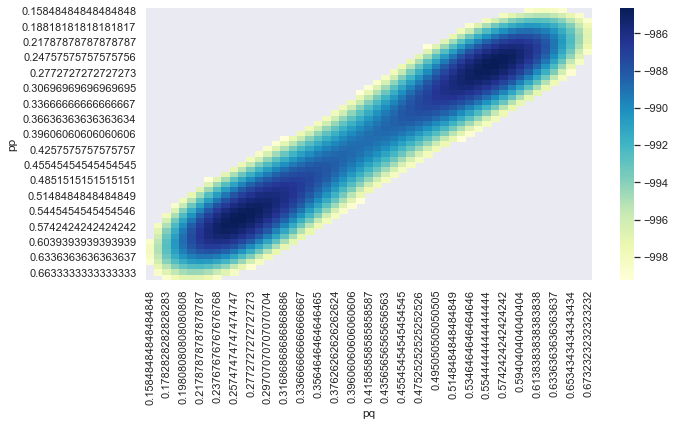

In [58]:
data = {'pp': ppvalues, 'pq': pqvalues, 'arrayl': arrayl}

datadf = pd.DataFrame(data=data)
dfs = datadf.sort_values('arrayl', ascending = False).head(1000)

sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(dfs.pivot('pp', 'pq', 'arrayl'), cmap="YlGnBu")

## 1.e and d

In [61]:
maxvalue = np.argmax(arrayl)
print("Maximum value:", maxvalue) 
print("p:", ppvalues[maxvalue])
print("q: ", pqvalues[maxvalue])                      

Maximum value: 2556
p: 0.25747474747474747
q:  0.5643434343434344


## 2. Calculate and show a KDE for the data described in the following histogram; explain your choice of the bandwidth parameter:

## First way:

In [6]:
numbers = [20.3, 32.7, 45.2, 57.6, 70, 82.4, 94.9, 107.3, 119.7, 132.1]     
occ =  [402,590,10,9,39,116,157,115,50,12]
result = [x for x, y in zip(numbers, occ) for b in range(y)]
arr = np.array(result).reshape(-1,1)


def normal_kernel(x):
    return 1/ np.sqrt(2*np.pi) * np.exp(-x**2/2)

In [7]:
def KDE (kernel, bandwidth, arr):
    return np.vectorize(lambda v: kernel((arr-v)/ bandwidth).mean()/bandwidth)

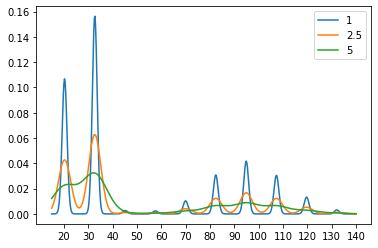

In [8]:
for k in [1,2.5,5]:
    kde_pdf = KDE (normal_kernel, k, arr)
    xx = np.linspace(15,140,500)
    yy = kde_pdf(xx)
    plt.plot(xx,yy, label=k)

plt.rcParams["figure.figsize"] = (20,8)  
plt.xticks(np.arange(20,150,10))
plt.legend()
plt.show()

## Second way with KernelDensity() model:

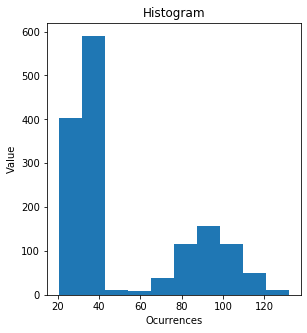

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.subplot(122)
plt.hist(arr, bins=10)
plt.xlabel('Ocurrences')
plt.ylabel('Value')


plt.title('Histogram')
plt.show()



In [10]:
x_test = np.linspace(0, 150, 1500)[:, np.newaxis]
model = KernelDensity()
model.fit(arr)
log_dens = model.score_samples(x_test)

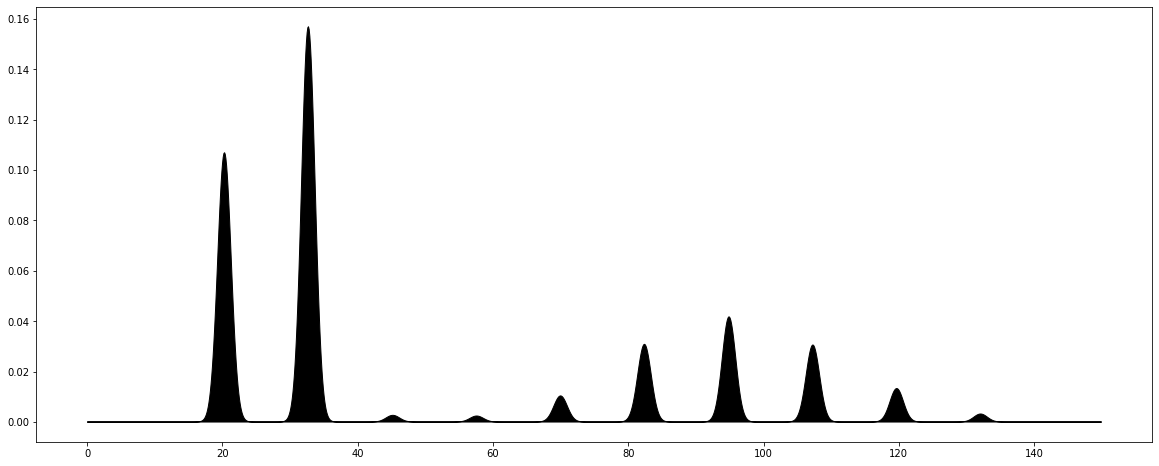

In [11]:
plt.fill(x_test, np.exp(log_dens), c='black')
plt.show()

## And also tried to find a algorithm for choosing best bandwidth:

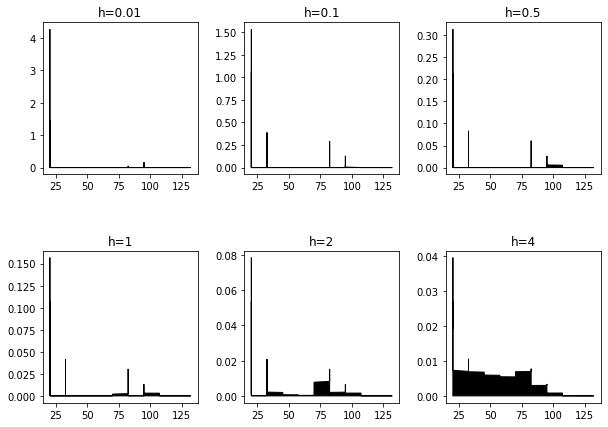

In [12]:
bandwidths = [0.01, 0.1, 0.5, 1, 2, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(arr)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(arr, np.exp(score), c='black')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

In [13]:
bandwidth = np.arange(1, 2.5, .1)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(arr)

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

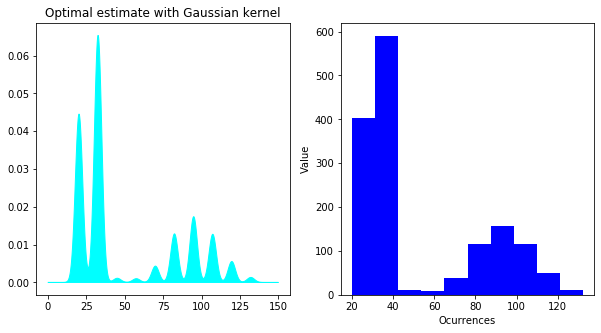

optimal bandwidth: 2.40


In [14]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.subplot(122)
plt.hist(arr, bins=10, color = 'b')
plt.xlabel('Ocurrences')
plt.ylabel('Value')

plt.subplot(121)
plt.title('Histogram')

plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.title('Optimal estimate with Gaussian kernel')

plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

## After all those trials and readings, I would say optimal bandwidth for this array is around 2.4.

https://link.springer.com/article/10.1007/s10827-009-0180-4
  

https://www.neuralengine.org/res/kernel.html#Ref  

https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/